In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_csv('../input/data-science-posts/df.csv')
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,FavoriteCount,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName
0,5,1,2014-05-13T23:58:30.457,9,820.0,<p>I've always been interested in machine lear...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,...,1.0,2014-05-14T14:40:25.950,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1,2014-05-14T00:11:06.457,4,462.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,...,1.0,2014-05-14T08:40:54.950,CC BY-SA 3.0,10.0,97.0,2014-05-16T13:45:00.237,NaN,NaN,NaN,NaN
2,9,2,2014-05-14T00:36:31.077,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51.0,2014-05-14T00:36:31.077,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
3,10,2,2014-05-14T00:53:43.273,13,NaN,"<p>One book that's freely available is ""The El...",22.0,2014-05-14T00:53:43.273,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
4,14,1,2014-05-14T01:25:59.677,25,1876.0,<p>I am sure data science as will be discussed...,66.0,2020-08-16T13:01:33.543,Is Data Science the Same as Data Mining?,<data-mining><definitions>,...,6.0,NaN,CC BY-SA 3.0,29.0,322.0,2014-06-17T16:17:20.473,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'Body',
       'OwnerUserId', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'ContentLicense',
       'AcceptedAnswerId', 'LastEditorUserId', 'LastEditDate', 'ParentId',
       'OwnerDisplayName', 'CommunityOwnedDate', 'LastEditorDisplayName'],
      dtype='object')

In [ ]:
df.shape

(69111, 22)

In [ ]:
df = df.drop_duplicates(subset=['Body'], keep='first')

In [ ]:
df.shape

(68940, 22)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.Body[0] #test

'<p>I\'ve always been interested in machine learning, but I can\'t figure out one thing about starting out with a simple "Hello World" example - how can I avoid hard-coding behavior?</p>\n\n<p>For example, if I wanted to "teach" a bot how to avoid randomly placed obstacles, I couldn\'t just use relative motion, because the obstacles move around, but I don\'t want to hard code, say, distance, because that ruins the whole point of machine learning.</p>\n\n<p>Obviously, randomly generating code would be impractical, so how could I do this?</p>\n'

In [ ]:
df = df.sample(n=10000, random_state=42)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint



In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel



In [ ]:
import spacy



In [ ]:
import pyLDAvis

import pyLDAvis.gensim



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [ ]:
len(stop_words)

221

In [ ]:
def clean(text):
    punctuation = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~.'
    text  = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    return text

In [ ]:
def removestopwords(df):
    stop = stopwords.words('english')
    df['Body'] = df['Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df['Body'] = df['Body'].apply(lambda x: clean(x))
    return df

In [ ]:
import string

english_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ؛"-…،'''
english_punctuations2 = string.punctuation
punctuations_list = english_punctuations + english_punctuations2

def remove_punctuations(text):
    translator  = re.compile('[%s]' % re.escape(punctuations_list))
    translator .sub(' ', text)
    text = re.sub(' +',' ', text).strip()
    return text


In [ ]:
df['Body'][0]

'<p>No you should declare it ahead of the class, just after importing the packages. You have declare the seed for numpy and tensorflow separately. For further details read this blog -\n<a href="https://machinelearningmastery.com/reproducible-results-neural-networks-keras/" rel="nofollow noreferrer">https://machinelearningmastery.com/reproducible-results-neural-networks-keras/</a></p>\n'

In [ ]:
df['Body'] = df['Body'].apply(lambda x: remove_punctuations(x))


In [ ]:
df['Body'] = df['Body'].str.replace('<p><a href=',' ')
df['Body'] = df['Body'].str.replace('</p>',' ')
df['Body'] = df['Body'].str.replace('\n',' ')
df['Body'] = df['Body'].str.replace('<p>',' ')
df['Body'] = df['Body'].str.replace('</a',' ')
df['Body'] = df['Body'].str.replace('<a ',' ')

df['Body'] = df['Body'].str.replace('>',' ')

df['Body'] = df['Body'].str.replace('=',' ')
df['Body'] = df['Body'].str.replace('href',' ')




df['Body'].replace(r'…',' ',inplace=True, regex=True)
df['Body'].replace(r'_',' ',inplace=True, regex=True)
df['Body'].replace(r'\\\)',' ',inplace=True, regex=True)
df['Body'].replace(r'،',' ',inplace=True, regex=True)
df['Body'].replace(r'"',' ',inplace=True, regex=True)
df['Body'].replace(r'-',' ',inplace=True, regex=True)
df['Body'].replace(r'؛',' ',inplace=True, regex=True)
df['Body'].replace(r'/',' ',inplace=True, regex=True)
df['Body'] = df['Body'].str.replace('\d+', ' ')
df['Body'] = df['Body'].str.replace(' +',' ')
df['Body'] = df['Body'].str.replace('RT',' ')
df['Body'] = df['Body'].str.replace('#',' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
df['Body'][0]

' No you should declare it ahead of the class, just after importing the packages. You have declare the seed for numpy and tensorflow separately. For further details read this blog https: machinelearningmastery.com reproducible results neural networks keras rel nofollow noreferrer https: machinelearningmastery.com reproducible results neural networks keras '

In [ ]:
from nltk.tokenize import RegexpTokenizer
stop_en = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
after_stopwords = []

for i in df["Body"]:
    tokens = tokenizer.tokenize(i)
    stopped_tokens = [w for w in tokens if w not in stop_en and w not in punctuations_list]
   
    after_stopwords.append(' '.join(stopped_tokens))
df['Body'] = after_stopwords

In [ ]:
df['Body'][0]

'No declare ahead class importing packages You declare seed numpy tensorflow separately For details read blog https machinelearningmastery com reproducible results neural networks keras rel nofollow noreferrer https machinelearningmastery com reproducible results neural networks keras'

In [ ]:
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,FavoriteCount,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName
0,91080,2,2021-03-24T05:20:37.527,0,NaN,No declare ahead class importing packages You ...,86219.0,2021-03-24T05:20:37.527,NaN,NaN,...,NaN,NaN,CC BY-SA 4.0,NaN,NaN,NaN,91078.0,NaN,NaN,NaN
1,13386,2,2016-08-12T06:57:16.147,1,NaN,Have look ng dataset classification techniques...,21024.0,2016-08-12T06:57:16.147,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,-1.0,2017-04-13T12:50:41.230,13385.0,NaN,NaN,NaN
2,49322,2,2019-04-15T13:09:21.213,6,NaN,This requirement satisfied adding sufficient n...,67328.0,2019-04-15T13:09:21.213,NaN,NaN,...,NaN,NaN,CC BY-SA 4.0,NaN,NaN,NaN,49226.0,NaN,NaN,NaN
3,69347,2,2020-03-08T08:44:34.880,-1,NaN,I take really interested prediction new test s...,85145.0,2020-03-08T09:00:53.847,NaN,NaN,...,NaN,NaN,CC BY-SA 4.0,NaN,85145.0,2020-03-08T09:00:53.847,69336.0,NaN,NaN,NaN
4,40816,2,2018-11-06T11:53:38.963,0,NaN,I would look memory use Spark I presume using ...,61765.0,2018-11-06T14:24:48.580,NaN,NaN,...,NaN,NaN,CC BY-SA 4.0,NaN,29575.0,2018-11-06T14:24:48.580,40130.0,NaN,NaN,NaN


In [ ]:
# Convert to list
df['Body']= df['Body'].apply(str)

data = df.Body.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['No declare ahead class importing packages You declare seed numpy tensorflow '
 'separately For details read blog https machinelearningmastery com '
 'reproducible results neural networks keras rel nofollow noreferrer https '
 'machinelearningmastery com reproducible results neural networks keras']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['no', 'declare', 'ahead', 'class', 'importing', 'packages', 'you', 'declare', 'seed', 'numpy', 'tensorflow', 'separately', 'for', 'details', 'read', 'blog', 'https', 'com', 'reproducible', 'results', 'neural', 'networks', 'keras', 'rel', 'nofollow', 'noreferrer', 'https', 'com', 'reproducible', 'results', 'neural', 'networks', 'keras']]


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
nlp.disable_pipes('ner', 'parser')

['ner', 'parser']

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [ ]:
pprint(data_ready[80])

['com',
 'question',
 'implement',
 'simple',
 'linear',
 'regression',
 'neural_network',
 'code',
 'put',
 'part',
 'parameter',
 'list',
 'error',
 'indicate',
 'first',
 'member',
 'list',
 'put',
 'first',
 'row',
 'second',
 'one',
 'model',
 'import',
 'sequential',
 'layer',
 'import',
 'dense',
 'kera',
 'import',
 'optimizer',
 'generate',
 'dummy',
 'datum',
 'datum',
 'define',
 'model',
 'baseline',
 'model',
 'model',
 'sequential',
 'model',
 'add',
 'optimizer',
 'sgd',
 'sgd',
 'loss',
 'mean_square',
 'error',
 'metric',
 'accuracy',
 'return',
 'predict',
 'unsuccessful',
 'cause',
 'error',
 'less',
 'argoment',
 'expect',
 'blockquote',
 'valueerror',
 'error',
 'check',
 'model',
 'input',
 'list',
 'numpy_array',
 'pass',
 'model',
 'size',
 'model',
 'expect',
 'expect',
 'array',
 'instead',
 'follow',
 'list',
 'array']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus
texts = data_ready

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]



In [ ]:
def compute_coherence_values_LDA(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        #gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values_LDA(dictionary=id2word, corpus=corpus, texts=data_ready, start=3, limit=10, step=1)

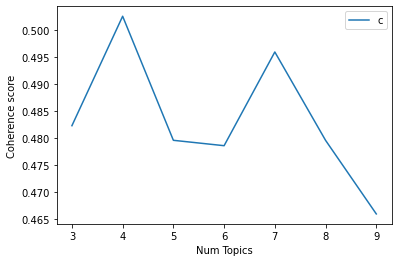

In [ ]:
limit=10; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.4823
Num Topics = 4  has Coherence Value of 0.5025
Num Topics = 5  has Coherence Value of 0.4796
Num Topics = 6  has Coherence Value of 0.4786
Num Topics = 7  has Coherence Value of 0.4959
Num Topics = 8  has Coherence Value of 0.4796
Num Topics = 9  has Coherence Value of 0.4659


In [ ]:
df = pd.read_csv('../input/data-science-posts/df.csv')
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,FavoriteCount,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName
0,5,1,2014-05-13T23:58:30.457,9,820.0,<p>I've always been interested in machine lear...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,...,1.0,2014-05-14T14:40:25.950,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1,2014-05-14T00:11:06.457,4,462.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,...,1.0,2014-05-14T08:40:54.950,CC BY-SA 3.0,10.0,97.0,2014-05-16T13:45:00.237,NaN,NaN,NaN,NaN
2,9,2,2014-05-14T00:36:31.077,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51.0,2014-05-14T00:36:31.077,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
3,10,2,2014-05-14T00:53:43.273,13,NaN,"<p>One book that's freely available is ""The El...",22.0,2014-05-14T00:53:43.273,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
4,14,1,2014-05-14T01:25:59.677,25,1876.0,<p>I am sure data science as will be discussed...,66.0,2020-08-16T13:01:33.543,Is Data Science the Same as Data Mining?,<data-mining><definitions>,...,6.0,NaN,CC BY-SA 3.0,29.0,322.0,2014-06-17T16:17:20.473,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop_duplicates(subset=['Body'], keep='first')

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(68940, 22)

In [ ]:
df.dropna(subset = ["Body"], inplace=True)
df.shape

(68939, 22)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df['Body'] = df['Body'].apply(lambda x: remove_punctuations(x))


In [ ]:
df['Body'] = df['Body'].str.replace('<p><a href=',' ')
df['Body'] = df['Body'].str.replace('</p>',' ')
df['Body'] = df['Body'].str.replace('\n',' ')
df['Body'] = df['Body'].str.replace('<p>',' ')
df['Body'] = df['Body'].str.replace('</a',' ')
df['Body'] = df['Body'].str.replace('<a ',' ')

df['Body'] = df['Body'].str.replace('>',' ')

df['Body'] = df['Body'].str.replace('=',' ')
df['Body'] = df['Body'].str.replace('href',' ')




df['Body'].replace(r'…',' ',inplace=True, regex=True)
df['Body'].replace(r'_',' ',inplace=True, regex=True)
df['Body'].replace(r'\\\)',' ',inplace=True, regex=True)
df['Body'].replace(r'،',' ',inplace=True, regex=True)
df['Body'].replace(r'"',' ',inplace=True, regex=True)
df['Body'].replace(r'-',' ',inplace=True, regex=True)
df['Body'].replace(r'؛',' ',inplace=True, regex=True)
df['Body'].replace(r'/',' ',inplace=True, regex=True)
df['Body'] = df['Body'].str.replace('\d+', ' ')
df['Body'] = df['Body'].str.replace(' +',' ')
df['Body'] = df['Body'].str.replace('RT',' ')
df['Body'] = df['Body'].str.replace('#',' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
from nltk.tokenize import RegexpTokenizer
stop_en = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
after_stopwords = []

for i in df["Body"]:
    tokens = tokenizer.tokenize(i)
    #tagged_sent = i.split()
    stopped_tokens = [w for w in tokens if w not in stop_en and w not in punctuations_list]
    #stopped_tokens = [arabic_stemmer.light_stem(i) for i in stopped_tokens]
    
    #for words in tagged_sent:                           
    #    chunks = [words for words in tagged_sent if not words in ar_stop]     
        #chunks = [arabic_stemmer.light_stem(i) for i in chunks]

    after_stopwords.append(' '.join(stopped_tokens))
df['Body'] = after_stopwords

In [ ]:
# Convert to list
df['Body']= df['Body'].apply(str)

data = df.Body.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['I always interested machine learning I figure one thing starting simple '
 'Hello World example I avoid hard coding behavior For example I wanted teach '
 'bot avoid randomly placed obstacles I use relative motion obstacles move '
 'around I want hard code say distance ruins whole point machine learning '
 'Obviously randomly generating code would impractical could I']


In [ ]:
data_words = list(sent_to_words(data))

print(data_words[:1])

[['always', 'interested', 'machine', 'learning', 'figure', 'one', 'thing', 'starting', 'simple', 'hello', 'world', 'example', 'avoid', 'hard', 'coding', 'behavior', 'for', 'example', 'wanted', 'teach', 'bot', 'avoid', 'randomly', 'placed', 'obstacles', 'use', 'relative', 'motion', 'obstacles', 'move', 'around', 'want', 'hard', 'code', 'say', 'distance', 'ruins', 'whole', 'point', 'machine', 'learning', 'obviously', 'randomly', 'generating', 'code', 'would', 'impractical', 'could']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=30, threshold=200) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=150)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
data_ready = process_words(data_words)  # processed Text Data!

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.079*"strong" + 0.070*"com" + 0.062*"https" + 0.058*"noreferrer" + '
  '0.057*"rel" + 0.047*"quot" + 0.043*"stack" + 0.039*"style" + 0.038*"image" '
  '+ 0.037*"predict"'),
 (1,
  '0.131*"code" + 0.043*"pre" + 0.028*"score" + 0.023*"value" + 0.018*"add" + '
  '0.016*"prediction" + 0.016*"metric" + 0.014*"import" + 0.014*"point" + '
  '0.014*"error"'),
 (2,
  '0.190*"train" + 0.037*"index" + 0.035*"batch" + 0.030*"list" + 0.022*"lstm" '
  '+ 0.019*"last" + 0.017*"file" + 0.017*"data" + 0.017*"datum" + '
  '0.016*"tensorflow"'),
 (3,
  '0.036*"layer" + 0.034*"span" + 0.033*"container" + 0.032*"self" + '
  '0.031*"input" + 0.029*"output" + 0.026*"png" + 0.024*"loss" + 0.024*"size" '
  '+ 0.023*"word"'),
 (4,
  '0.095*"class" + 0.074*"text" + 0.050*"math" + 0.035*"question" + '
  '0.017*"align_center" + 0.016*"user" + 0.014*"name" + 0.013*"align_left" + '
  '0.012*"data" + 0.011*"product"'),
 (5,
  '0.056*"model" + 0.029*"datum" + 0.024*"test" + 0.021*"feature" + '
  '0.015*"set" 

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.6460,"code, pre, score, value, add, prediction, metr...","[always, interested, machine, learning, figure..."
1,1,5.0,0.6069,"model, datum, test, feature, set, training, ti...","[researcher, instructor, look, open_source, bo..."
2,2,5.0,0.8420,"model, datum, test, feature, set, training, ti...","[sure, fit, scope, answer, ai, approach, decid..."
3,3,1.0,0.5778,"code, pre, score, value, add, prediction, metr...","[book, element, statistical, learning, publish..."
4,4,4.0,0.7125,"class, text, math, question, align_center, use...","[sure, datum, science, discuss, forum, several..."
5,5,3.0,0.6946,"layer, span, container, self, input, output, p...","[situation, system, prefer, relative, non]"
6,6,0.0,0.5668,"strong, com, https, noreferrer, rel, quot, sta...","[libsvm, libsvm, train, datum, predict, classi..."
7,7,0.0,0.8960,"strong, com, https, noreferrer, rel, quot, sta...","[libsvm, rel, library, support, vector, classi..."
8,8,5.0,0.9091,"model, datum, test, feature, set, training, ti...","[people, term, big, datum, commercial, way, me..."
9,9,5.0,0.8280,"model, datum, test, feature, set, training, ti...","[create, social, network, application, elearne..."


In [ ]:
df_dominant_topic.shape

(68939, 5)

In [ ]:

# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9404,"strong, com, https, noreferrer, rel, quot, stack, style, image, predict","[python, library, help, task, library, module, https, org, project, rel, nofollow, org, project]"
1,1.0,0.9540,"code, pre, score, value, add, prediction, metric, import, point, error","[dataframe, pre, value, value, value, value, value, value, value, value, value, value, value, va..."
2,2.0,0.7021,"train, index, batch, list, lstm, last, file, data, datum, tensorflow","[errno, strong, file, directory, strong, directory, path, write, file, pass, check, path]"
3,3.0,0.9303,"layer, span, container, self, input, output, png, loss, size, word","[create, resnet, model, show, presentation, visualize, tool, graphic, description, model, descri..."
4,4.0,0.8414,"class, text, math, question, align_center, user, name, align_left, data, product","[question, regard, career, datum, scientist, pursue, degree, business, analytic, minor, computer..."
5,5.0,0.9768,"model, datum, test, feature, set, training, time, value, problem, dataset","[remove, variable, reason, follow, artificial, imputation, add, bias, result, justified, datum, ..."


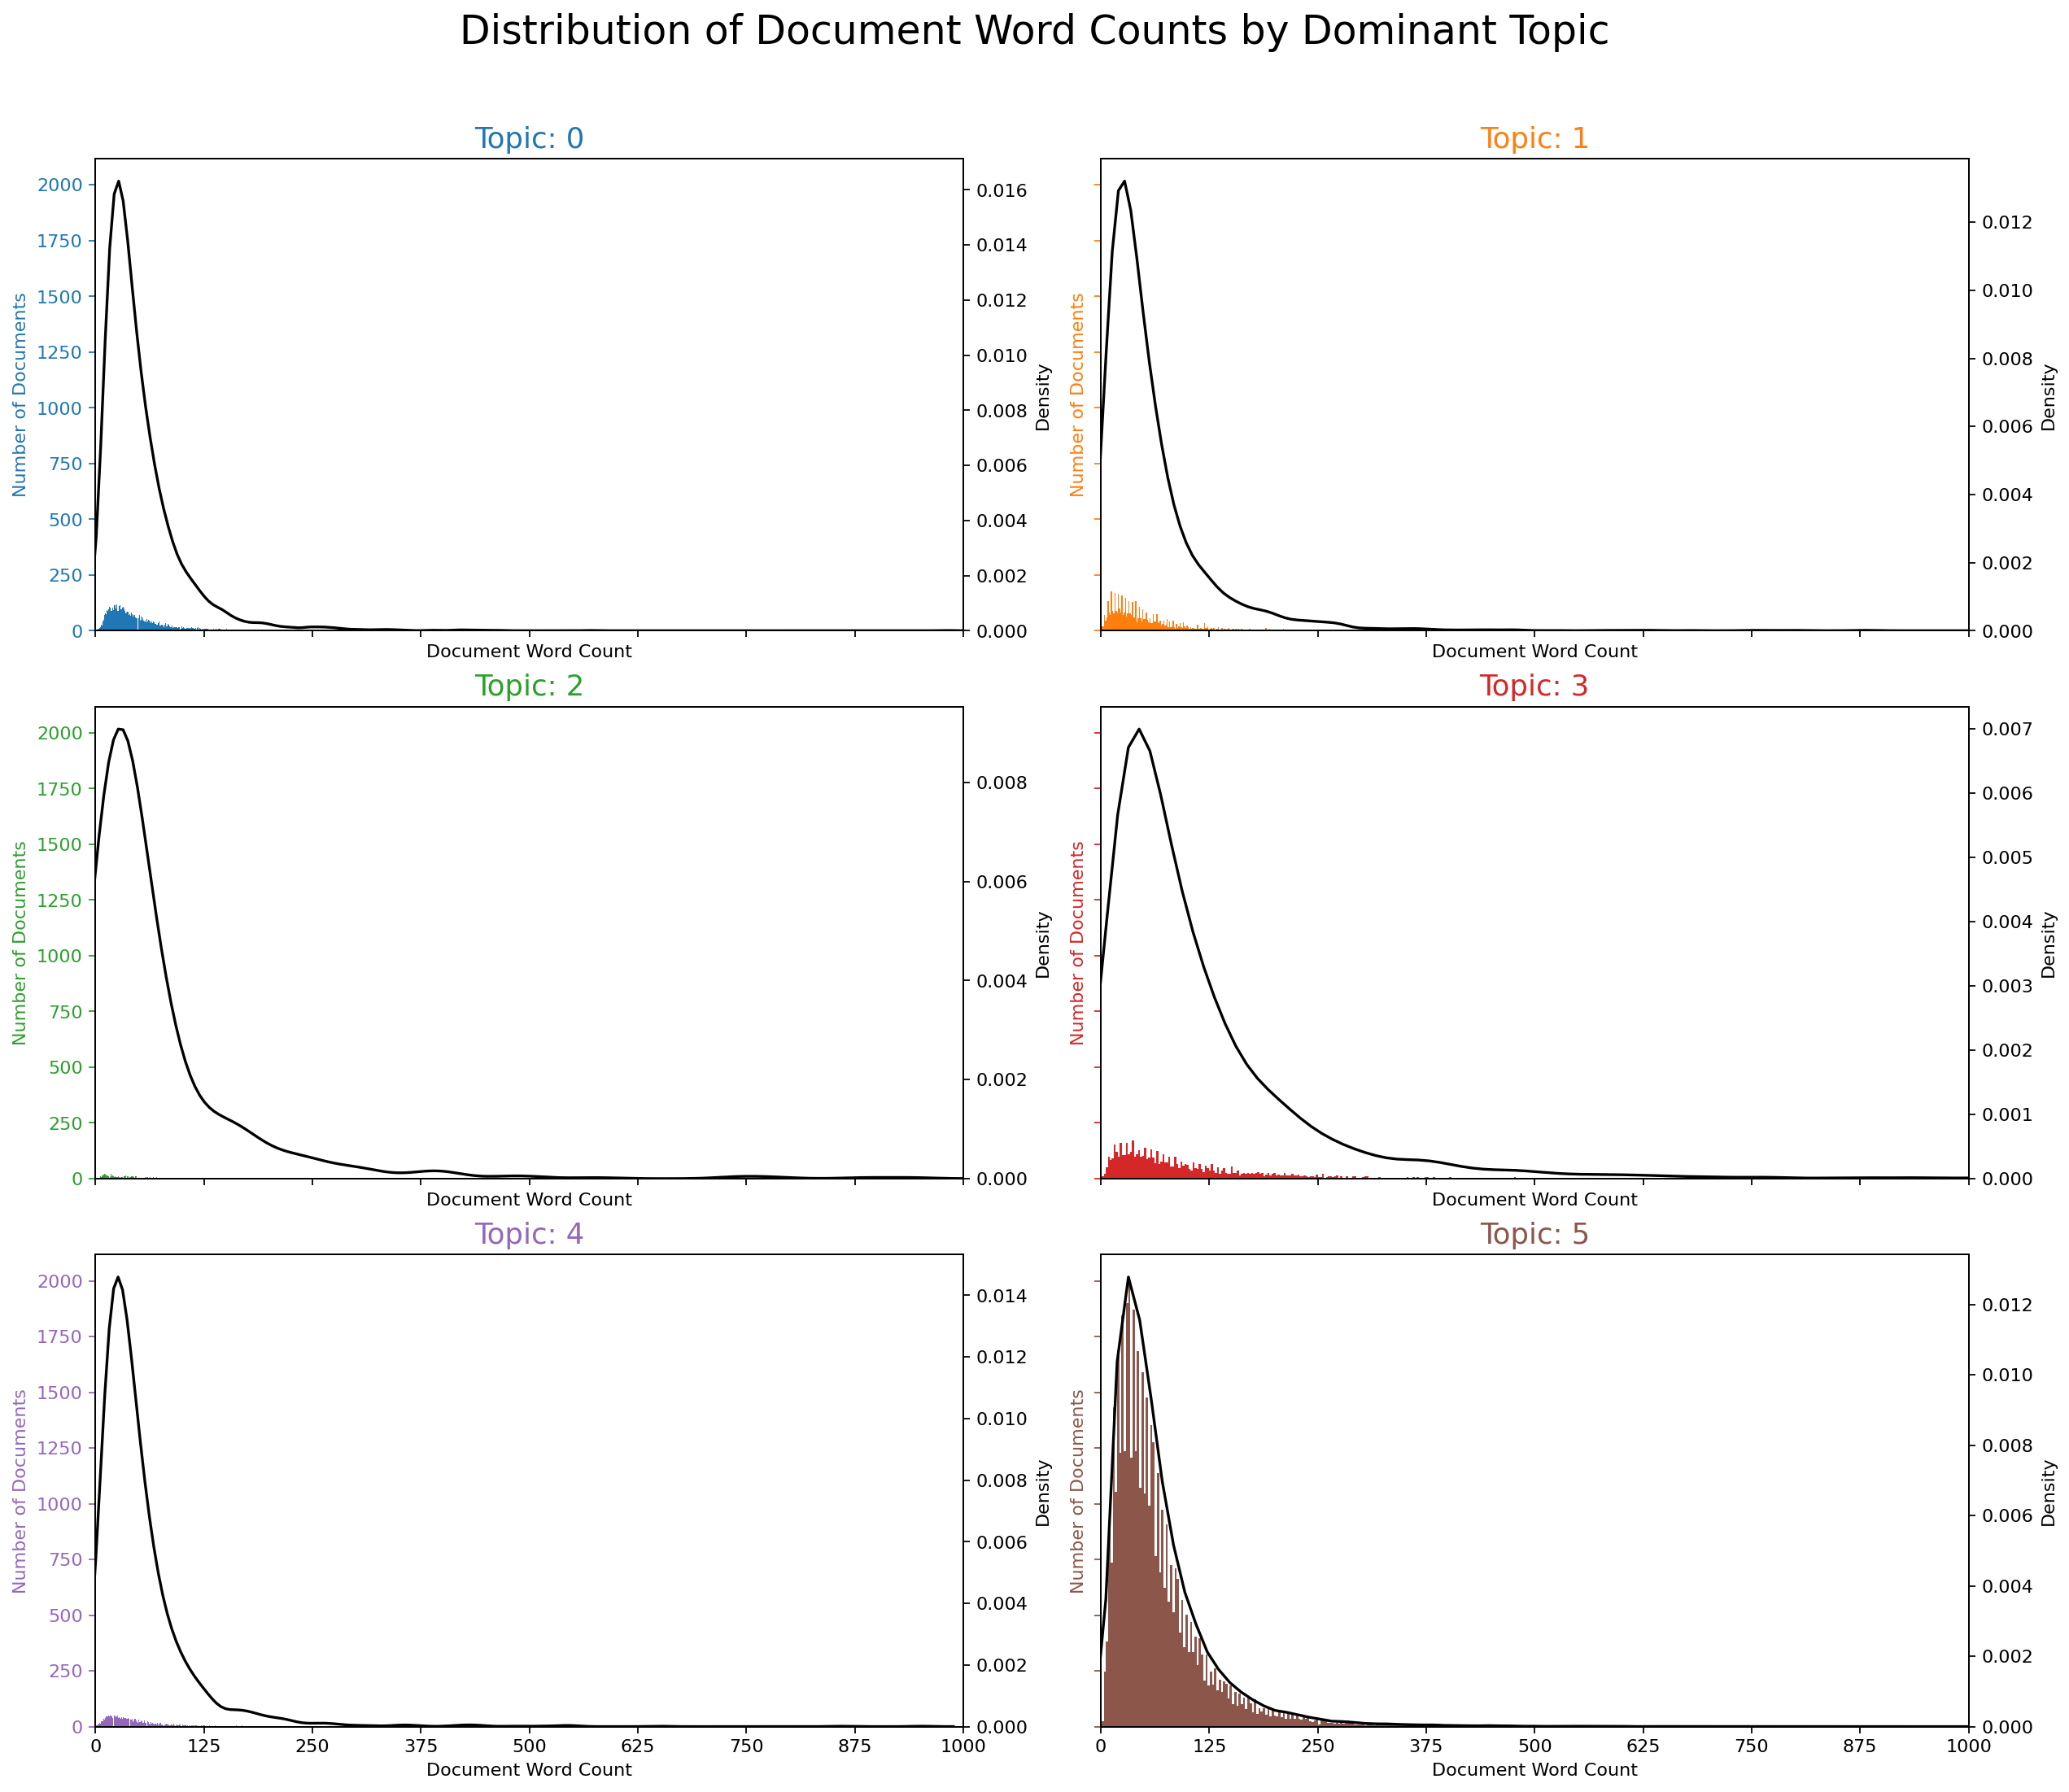

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.008312 -0.210324       1        1  40.997176
3     -0.297399  0.078556       2        1  16.161481
1     -0.238582 -0.002653       3        1  13.814350
0      0.197526  0.014167       4        1  12.444537
4      0.178077 -0.223988       5        1  10.697956
2      0.168690  0.344241       6        1   5.884499, topic_info=        Term           Freq          Total Category  logprob  loglift
4       code   86045.000000   86045.000000  Default  30.0000  30.0000
156    train   53022.000000   53022.000000  Default  29.0000  29.0000
114    class   48376.000000   48376.000000  Default  28.0000  28.0000
155   strong   46829.000000   46829.000000  Default  27.0000  27.0000
77     model  107863.000000  107863.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
115     data    4773.641281   13101.923531   Topic6  -4.0671   1.8232
1112   print    3585.065573    9148.801391   Topic6  -4.3535   1.8960
141    issue    2255.494083    4321.916781   Topic6  -4.8169   2.1825
34     datum    4701.754450   61094.517315   Topic6  -4.0823   0.2684
217     call    1600.607560    5974.642853   Topic6  -5.1599   1.5157

[271 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2301      2  0.415002    accuracy
2301      3  0.584935    accuracy
2191      2  0.999937  activation
208       1  0.223097         add
208       3  0.776860         add
...     ...       ...         ...
294       1  0.696718        work
294       3  0.069731        work
294       4  0.079486        work
294       5  0.153997        work
129       5  0.999709        year

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 1, 5, 3])

In [ ]:
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,FavoriteCount,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName
0,5,1,2014-05-13T23:58:30.457,9,820.0,I always interested machine learning I figure one thing starting simple Hello World example I av...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without hard-coding behavior?,<machine-learning>,...,1.0,2014-05-14T14:40:25.950,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1,2014-05-14T00:11:06.457,4,462.0,As researcher instructor I looking open source books similar materials provide relatively thorou...,36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) provide a relatively thorough overview of data science?,<education><open-source>,...,1.0,2014-05-14T08:40:54.950,CC BY-SA 3.0,10.0,97.0,2014-05-16T13:45:00.237,NaN,NaN,NaN,NaN
2,9,2,2014-05-14T00:36:31.077,5,NaN,Not sure fits scope SE stab answer anyway With AI approaches decide modelling kind uncertainty O...,51.0,2014-05-14T00:36:31.077,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
3,10,2,2014-05-14T00:53:43.273,13,NaN,One book freely available The Elements Statistical Learning Hastie Tibshirani Friedman published...,22.0,2014-05-14T00:53:43.273,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
4,14,1,2014-05-14T01:25:59.677,25,1876.0,I sure data science discussed forum several synonyms least related fields large data analyzed My...,66.0,2020-08-16T13:01:33.543,Is Data Science the Same as Data Mining?,<data-mining><definitions>,...,6.0,NaN,CC BY-SA 3.0,29.0,322.0,2014-06-17T16:17:20.473,NaN,NaN,NaN,NaN


In [ ]:
df['Dominant_Topic'] = df_dominant_topic['Dominant_Topic']

In [ ]:
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,Dominant_Topic
0,5,1,2014-05-13T23:58:30.457,9,820.0,I always interested machine learning I figure one thing starting simple Hello World example I av...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without hard-coding behavior?,<machine-learning>,...,2014-05-14T14:40:25.950,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,7,1,2014-05-14T00:11:06.457,4,462.0,As researcher instructor I looking open source books similar materials provide relatively thorou...,36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) provide a relatively thorough overview of data science?,<education><open-source>,...,2014-05-14T08:40:54.950,CC BY-SA 3.0,10.0,97.0,2014-05-16T13:45:00.237,NaN,NaN,NaN,NaN,5.0
2,9,2,2014-05-14T00:36:31.077,5,NaN,Not sure fits scope SE stab answer anyway With AI approaches decide modelling kind uncertainty O...,51.0,2014-05-14T00:36:31.077,NaN,NaN,...,NaN,CC BY-SA 3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0
3,10,2,2014-05-14T00:53:43.273,13,NaN,One book freely available The Elements Statistical Learning Hastie Tibshirani Friedman published...,22.0,2014-05-14T00:53:43.273,NaN,NaN,...,NaN,CC BY-SA 3.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.0
4,14,1,2014-05-14T01:25:59.677,25,1876.0,I sure data science discussed forum several synonyms least related fields large data analyzed My...,66.0,2020-08-16T13:01:33.543,Is Data Science the Same as Data Mining?,<data-mining><definitions>,...,NaN,CC BY-SA 3.0,29.0,322.0,2014-06-17T16:17:20.473,NaN,NaN,NaN,NaN,4.0


In [ ]:
df.columns

Index(['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'Body',
       'OwnerUserId', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'ContentLicense',
       'AcceptedAnswerId', 'LastEditorUserId', 'LastEditDate', 'ParentId',
       'OwnerDisplayName', 'CommunityOwnedDate', 'LastEditorDisplayName',
       'Dominant_Topic'],
      dtype='object')

In [ ]:
df_0 = df[df['Dominant_Topic'] == 0]
df_1 = df[df['Dominant_Topic'] == 1]
df_2 = df[df['Dominant_Topic'] == 2]
df_3 = df[df['Dominant_Topic'] == 3]
df_4 = df[df['Dominant_Topic'] == 4]
df_5 = df[df['Dominant_Topic'] == 5]

In [ ]:
df.to_csv('df_final.csv')


In [ ]:
len(df_0),len(df_1),len(df_2),len(df_3),len(df_4),len(df_5)

(5851, 5251, 747, 6293, 2603, 48194)

In [ ]:
print(df_0.ViewCount.describe())

count      2304.000000
mean       1875.890191
std        8995.812221
min           4.000000
25%          38.000000
50%         131.500000
75%         684.000000
max      268099.000000
Name: ViewCount, dtype: float64


In [ ]:
print(df_1.ViewCount.describe())

count      2159.000000
mean       3725.635479
std       14786.715979
min           3.000000
25%          58.000000
50%         297.000000
75%        1737.500000
max      308042.000000
Name: ViewCount, dtype: float64


In [ ]:
print(df_2.ViewCount.describe())

count      365.000000
mean      2859.934247
std       7556.841423
min          7.000000
25%         52.000000
50%        350.000000
75%       2048.000000
max      67213.000000
Name: ViewCount, dtype: float64


In [ ]:
print(df_3.ViewCount.describe())

count      3430.000000
mean       1636.130904
std        7085.272597
min           3.000000
25%          46.000000
50%         174.500000
75%         872.500000
max      249602.000000
Name: ViewCount, dtype: float64


In [ ]:
print(df_4.ViewCount.describe())

count      1408.000000
mean       1884.705966
std        9859.452892
min           3.000000
25%          38.000000
50%         113.000000
75%         616.250000
max      191654.000000
Name: ViewCount, dtype: float64


In [ ]:
print(df_5.ViewCount.describe())

count     22831.000000
mean       1534.464456
std        8804.032749
min           2.000000
25%          40.000000
50%         123.000000
75%         605.500000
max      359046.000000
Name: ViewCount, dtype: float64


In [ ]:
print(df_0.AnswerCount.describe())

count    2304.000000
mean        1.071181
std         1.048607
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        17.000000
Name: AnswerCount, dtype: float64


In [ ]:
print(df_1.AnswerCount.describe())


count    2159.000000
mean        1.171376
std         0.994561
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: AnswerCount, dtype: float64


In [ ]:
print(df_2.AnswerCount.describe())


count    365.000000
mean       0.997260
std        0.976365
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        6.000000
Name: AnswerCount, dtype: float64


In [ ]:
print(df_3.AnswerCount.describe())


count    3430.000000
mean        0.948688
std         0.864546
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: AnswerCount, dtype: float64


In [ ]:
print(df_4.AnswerCount.describe())


count    1408.000000
mean        1.242188
std         1.315377
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: AnswerCount, dtype: float64


In [ ]:
print(df_5.AnswerCount.describe())

count    22831.000000
mean         1.120582
std          1.057709
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         35.000000
Name: AnswerCount, dtype: float64
